 jt -t monokai -T

In [2]:
import dill
dill.load_session('notebook_env.db')

In [3]:
%load -db

UsageError: option -d not recognized ( allowed: "yns:r:" )


In [4]:
%who

NamespaceMagics	 dill	 get_ipython	 getsizeof	 json	 np	 var_dic_list	 


In [5]:
NamespaceMagics()

In [6]:
%store 

Stored variables and their in-db values:


In [3]:
dill.load_session('notebook_env.db')

EOFError: Ran out of input

from google.colab import drive
drive.mount('/content/drive', force_remount=False)

In [4]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing
import fastai
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv'); #dataset_train

In [6]:
training_set = dataset_train.iloc[:, 1:2].values; training_set.shape

(1258, 1)

In [7]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1)); sc

MinMaxScaler(copy=True, feature_range=(0, 1))

In [8]:
training_set_scaled = sc.fit_transform(training_set);training_set_scaled.shape

(1258, 1)

In [9]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
X_train.shape

(1198, 60)

In [11]:
y_train.shape


(1198,)

In [12]:
#X_train

In [13]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [14]:
#X_train

In [15]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [16]:
#erroe

In [17]:
# Initialising the RNN
regressor = Sequential()

In [18]:
regressor

In [19]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0576
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0067
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0046
Epoch 5/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0046
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0047
Epoch 7/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0043
Epoch 8/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0045
Epoch

In [20]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Train.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)

In [21]:

inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

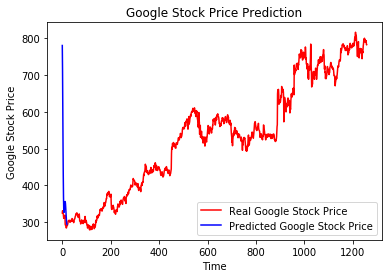

In [22]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [22]:
#!pip3 install ann_visualizer && pip install graphviz

In [23]:
#!easy install conda

In [24]:
#!conda update conda

In [25]:
#!conda install -c conda-forge ann_visualizer 

In [26]:
#load.save("regressor")

In [27]:
#from ann_visualizer.visualize import ann_viz;

#ann_viz(model, title="My first neural network")

In [1]:
import dill

In [35]:
%store

Stored variables and their in-db values:


In [2]:
dill.dump_session('notebook_env.db')

TypeError: no default __reduce__ due to non-trivial __cinit__

In [10]:
!conda install -c anaconda dill 

^C


In [53]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
__________